In [16]:
import pandas as pd
import act
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors

EC_data = pd.read_csv('/data/home/nsubhash/land-atmosphere-interaction/notebooks/eddypro_43m_fluxnet_2025-05-14T083625_adv.csv')


In [17]:
EC_data
EC_data.replace(-9999, np.nan, inplace=True)

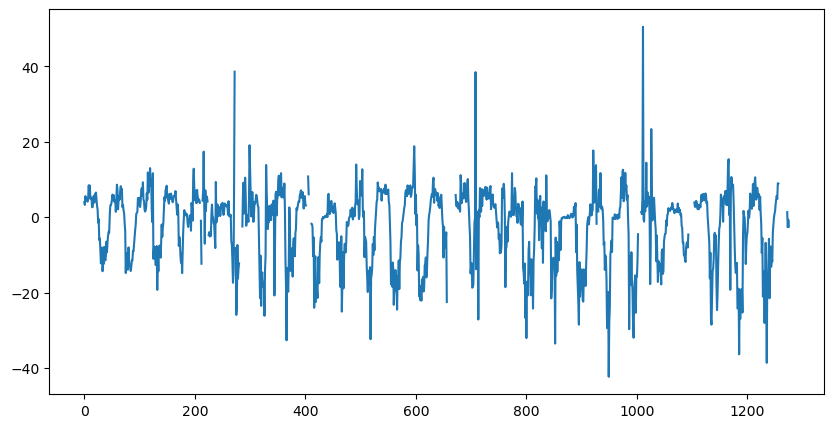

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(EC_data['FC'], label='FC')

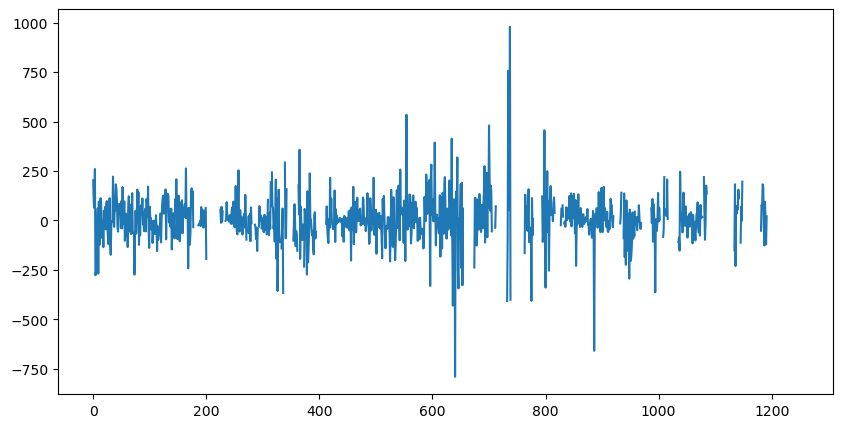

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(EC_data['FCH4'], label='FCH4')

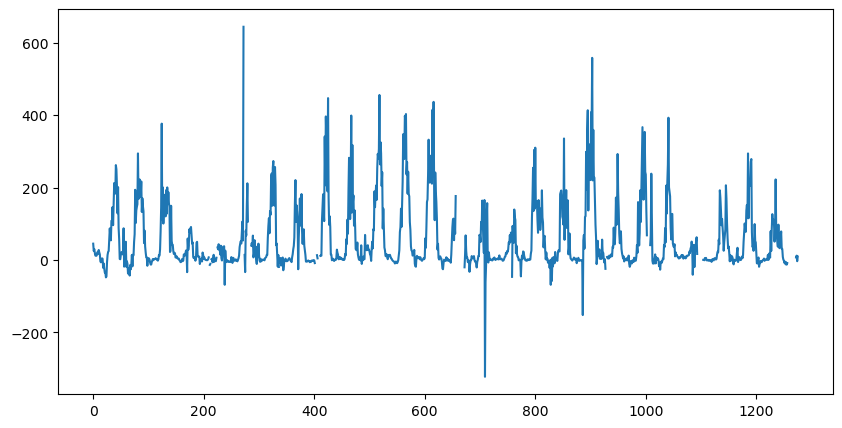

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(EC_data['LE'], label='LE')

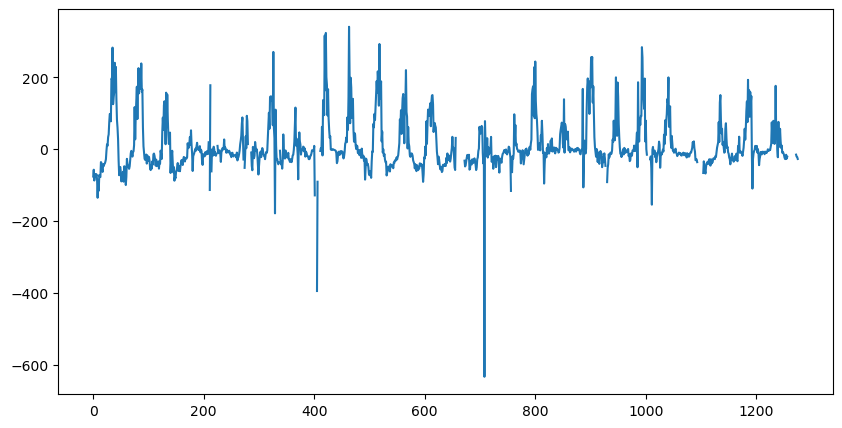

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(EC_data['H'], label='H')

In [65]:
# Set your username and token here!
username = 'nsubhash'
token = '15ba96792cdda45f'

# Set the datastream and start/enddates
datastream = 'bnfecorsfS30.b1'
startdate = '2024-10-01T00:00:00'
enddate = '2025-04-30T23:59:59'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result_ecor = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)



[DOWNLOADING] bnfecorsfS30.b1.20241014.000000.nc
[DOWNLOADING] bnfecorsfS30.b1.20250213.000000.nc
[DOWNLOADING] bnfecorsfS30.b1.20241205.000000.nc
[DOWNLOADING] bnfecorsfS30.b1.20241018.000000.nc
[DOWNLOADING] bnfecorsfS30.b1.20250211.000000.nc
[DOWNLOADING] bnfecorsfS30.b1.20241105.000000.nc
[DOWNLOADING] bnfecorsfS30.b1.20250409.000000.nc
[DOWNLOADING] bnfecorsfS30.b1.20241201.000000.nc
[DOWNLOADING] bnfecorsfS30.b1.20250111.000000.nc
[DOWNLOADING] bnfecorsfS30.b1.20250305.000000.nc
[DOWNLOADING] bnfecorsfS30.b1.20250121.000000.nc
[DOWNLOADING] bnfecorsfS30.b1.20250309.000000.nc
[DOWNLOADING] bnfecorsfS30.b1.20250430.000000.nc
[DOWNLOADING] bnfecorsfS30.b1.20250226.000000.nc
[DOWNLOADING] bnfecorsfS30.b1.20241204.000000.nc
[DOWNLOADING] bnfecorsfS30.b1.20250124.000000.nc
[DOWNLOADING] bnfecorsfS30.b1.20250427.000000.nc
[DOWNLOADING] bnfecorsfS30.b1.20250311.000000.nc
[DOWNLOADING] bnfecorsfS30.b1.20250126.000000.nc
[DOWNLOADING] bnfecorsfS30.b1.20241216.000000.nc
[DOWNLOADING] bnfeco

In [56]:
ds_ecor = act.io.read_arm_netcdf(result_ecor)
ds_ecor

<xarray.Dataset> Size: 4MB
Dimensions:                                 (time: 5751, bound: 2)
Coordinates:
  * time                                    (time) datetime64[ns] 46kB 2025-0...
Dimensions without coordinates: bound
Data variables: (12/146)
    base_time                               (time) datetime64[ns] 46kB 2025-0...
    time_offset                             (time) datetime64[ns] 46kB 2025-0...
    time_bounds                             (time, bound) object 92kB dask.array<chunksize=(48, 2), meta=np.ndarray>
    day_of_year                             (time) float32 23kB dask.array<chunksize=(48,), meta=np.ndarray>
    file_records                            (time) float64 46kB dask.array<chunksize=(48,), meta=np.ndarray>
    used_records                            (time) float64 46kB dask.array<chunksize=(48,), meta=np.ndarray>
    ...                                      ...
    covariance_w_h2o_cov                    (time) float32 23kB dask.array<chunksize=(48,), meta=np.ndarray>
    covariance_w_ch4_cov                    (time) float32 23kB dask.array<chunksize=(48,), meta=np.ndarray>
    co2_signal_strength_7500_mean           (time) float32 23kB dask.array<chunksize=(48,), meta=np.ndarray>
    lat                                     (time) float32 23kB 34.38 ... 34.38
    lon                                     (time) float32 23kB -86.93 ... -8...
    alt                                     (time) float32 23kB 183.0 ... 183.0
Attributes: (12/17)
    command_line:          ecorsf_ingest -s bnf -f S30
    Conventions:           ARM-1.3
    process_version:       ingest-ecorsf-1.3-0.el7
    dod_version:           ecorsf-b1-1.5
    input_source:          /data/collection/bnf/bnfecorsfS30.00/2024-12-31T23...
    site_id:               bnf
    ...                    ...
    doi:                   10.5439/1494128
    history:               created by user dsmgr on machine prod-proc2.adc.ar...
    _file_dates:           ['20250101', '20250102', '20250103', '20250104', '...
    _file_times:           ['000000', '000000', '000000', '000000', '000000',...
    _datastream:           bnfecorsfS30.b1
    _arm_standards_flag:   1

In [62]:

ds_ecor_qc = ds_ecor.where((ds_ecor.co2_flux > -50) & (ds_ecor.co2_flux < 30))
ds_ecor_qc
                           


<xarray.Dataset> Size: 5MB
Dimensions:                                 (time: 5751, bound: 2)
Coordinates:
  * time                                    (time) datetime64[ns] 46kB 2025-0...
Dimensions without coordinates: bound
Data variables: (12/146)
    base_time                               (time) datetime64[ns] 46kB dask.array<chunksize=(48,), meta=np.ndarray>
    time_offset                             (time) datetime64[ns] 46kB dask.array<chunksize=(48,), meta=np.ndarray>
    time_bounds                             (time, bound) object 92kB dask.array<chunksize=(48, 2), meta=np.ndarray>
    day_of_year                             (time) float32 23kB dask.array<chunksize=(48,), meta=np.ndarray>
    file_records                            (time) float64 46kB dask.array<chunksize=(48,), meta=np.ndarray>
    used_records                            (time) float64 46kB dask.array<chunksize=(48,), meta=np.ndarray>
    ...                                      ...
    covariance_w_h2o_cov                    (time) float32 23kB dask.array<chunksize=(48,), meta=np.ndarray>
    covariance_w_ch4_cov                    (time) float32 23kB dask.array<chunksize=(48,), meta=np.ndarray>
    co2_signal_strength_7500_mean           (time) float32 23kB dask.array<chunksize=(48,), meta=np.ndarray>
    lat                                     (time) float32 23kB dask.array<chunksize=(48,), meta=np.ndarray>
    lon                                     (time) float32 23kB dask.array<chunksize=(48,), meta=np.ndarray>
    alt                                     (time) float32 23kB dask.array<chunksize=(48,), meta=np.ndarray>
Attributes: (12/17)
    command_line:          ecorsf_ingest -s bnf -f S30
    Conventions:           ARM-1.3
    process_version:       ingest-ecorsf-1.3-0.el7
    dod_version:           ecorsf-b1-1.5
    input_source:          /data/collection/bnf/bnfecorsfS30.00/2024-12-31T23...
    site_id:               bnf
    ...                    ...
    doi:                   10.5439/1494128
    history:               created by user dsmgr on machine prod-proc2.adc.ar...
    _file_dates:           ['20250101', '20250102', '20250103', '20250104', '...
    _file_times:           ['000000', '000000', '000000', '000000', '000000',...
    _datastream:           bnfecorsfS30.b1
    _arm_standards_flag:   1

/tmp/ipykernel_3970/3219364233.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


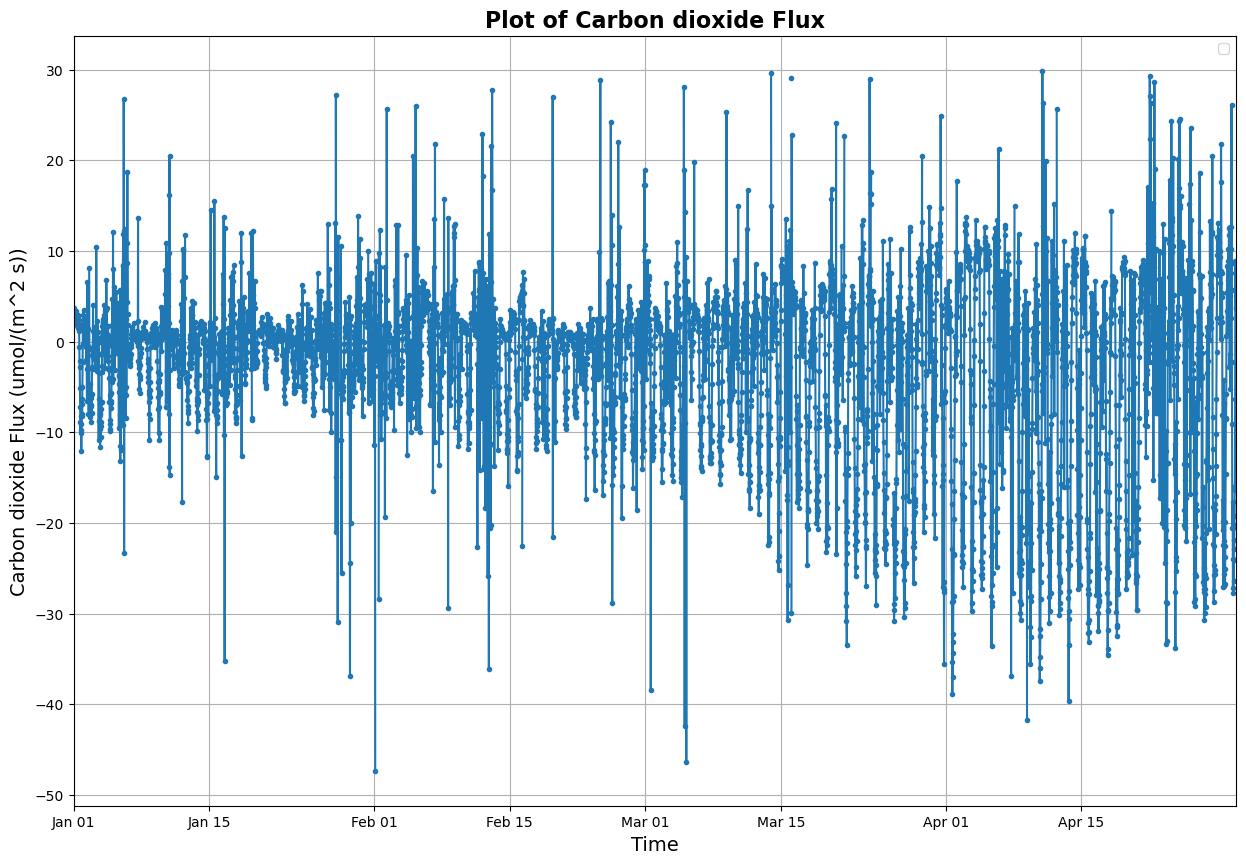

In [64]:
display = act.plotting.TimeSeriesDisplay(ds_ecor_qc, figsize=(15, 10))
co2_flux ='co2_flux'

#ds_ecor = act.qc.add_dqr_to_qc(ds_ecor, variable=sensible_heat_flux)
display.plot(co2_flux)
plt.title('Plot of Carbon dioxide Flux',fontsize=16, fontweight='bold')
plt.xlabel('Time',fontsize=14)
plt.ylabel('Carbon dioxide Flux (umol/(m^2 s))',fontsize=14)

plt.grid(True)
plt.legend()
plt.savefig('ECOR_OCT-Apr_S30.png', dpi=300)
plt.show()